<a href="https://colab.research.google.com/github/ebinjomonkottakal/DeepLearningProjects/blob/main/Basic_image_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [79]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

# Load and preprocess Fashion MNIST data

In [80]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

In [81]:
train_x.shape

(60000, 28, 28)

In [82]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


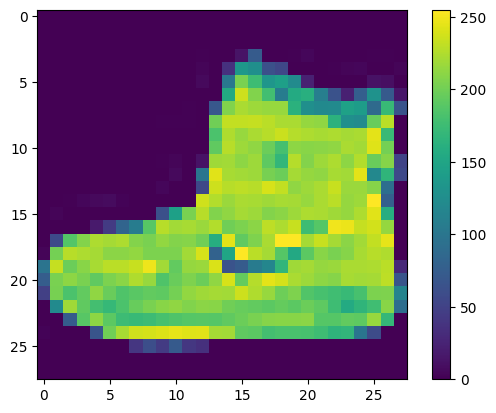

In [83]:
plt.figure()
plt.imshow(train_x[0])
plt.colorbar()
plt.show()

In [84]:
train_image = train_x/255.0
test_image= test_x/255.0

In [85]:
train_y.shape

(60000,)

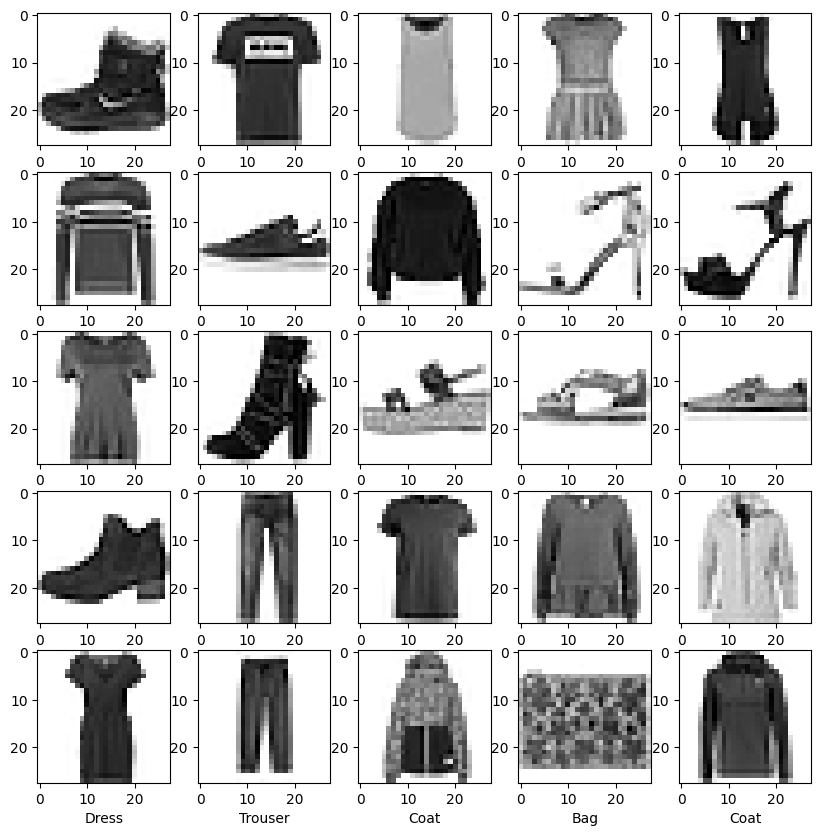

In [86]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_image[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_y[i]])

**Build the model**

In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

**Compile the model**

In [88]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [89]:
model.fit(train_image,train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4951 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3749 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3345 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3132 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2938 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2806 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2668 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2561 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2454 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss:

**Evaluate the model**

In [90]:
test_loss, test_accuracy = model.evaluate(test_image,test_y,verbose=2)

313/313 - 1s - loss: 0.3266 - accuracy: 0.8863 - 564ms/epoch - 2ms/step


In [91]:
predictions = tf.keras.Sequential([model,
                                   tf.keras.layers.Softmax()]).predict(test_image)

313/313 [==============================] - 1s 2ms/step


In [101]:
def plot_image(i,predictions,true_label,image):
  true_label,img = true_label[i],image[i]
  plt.imshow(img,cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions)
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions),
                                       class_names[true_label]))

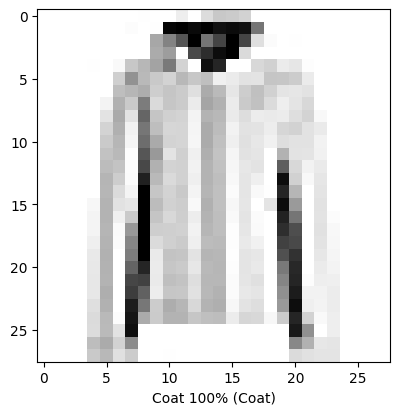

In [102]:
i = 6
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_y,test_image)